In [75]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import math

In [2]:
import plotly.express as px

In [3]:
import os
import json

In [4]:
import re
from datetime import datetime
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import metrics, preprocessing
## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)

In [5]:
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


In [6]:
# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)


# Users Dataset

In [7]:
#userDataset = pd.read_csv('raw_data\steam_users_purchase_play.csv')

In [8]:
#dfUsers = pd.DataFrame(userDataset)

In [9]:
#list(dfUsers.columns)

In [10]:
#display(dfUsers)

# Games Dataset

In [11]:
# games2005 = pd.read_csv('data/raw_data/year 2005-2008.csv')
# games2008 = pd.read_csv('data/raw_data/year 2008-2011.csv')
# games2011 = pd.read_csv('data/raw_data/year 2011-2014.csv')
# games2014 = pd.read_csv('data/raw_data/year 2014-2017.csv')
# games2017 = pd.read_csv('data/raw_data/year 2017-2022.csv')
# all_years=pd.read_csv('data/processed_data/all_years.csv')

In [12]:
# df2005 = pd.DataFrame(games2005)
# df2008 = pd.DataFrame(games2008)
# df2011 = pd.DataFrame(games2011)
# df2014 = pd.DataFrame(games2014)
# df2017 = pd.DataFrame(games2017)

In [13]:
# dfGames = pd.concat([df2005, df2008,df2011,df2014,df2017], axis=0)

In [14]:
# dfGames.info()

In [15]:
#  dfGames.rename(columns={'name': 'game_name'},
#           inplace=True, errors='raise')


In [16]:
# display(dfGames)

In [17]:
#df.to_csv('all_years.csv')

# Merged dataset

In [18]:

#df=pd.merge(dfUsers,dfGames)

In [19]:
df = pd.read_csv('users_games_dataset.csv')

C:\Users\USCS\AppData\Local\Temp\ipykernel_4924\3590791216.py:1: DtypeWarning: Columns (85,103,115,119,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('users_games_dataset.csv')


In [20]:
#df.to_csv('users_games_dataset.csv')

# Data Cleaning

In [21]:
display(df)

Unnamed: 0    user_id               game_name  hours  purchase  play  \
0               0  151603712               Fallout 4   87.0         1     1   
1               1   87445402               Fallout 4   83.0         1     1   
2               2   25096601               Fallout 4    1.6         1     1   
3               3  211925330               Fallout 4  133.0         1     1   
4               4  115396529               Fallout 4   17.9         1     1   
...           ...        ...                     ...    ...       ...   ...   
14201       14201   76892907   Double Dragon Trilogy    0.0         1     0   
14202       14202   76892907               EvilQuest    0.0         1     0   
14203       14203  204401529  Assassin's Creed Rogue   62.0         1     1   
14204       14204  116564064  Assassin's Creed Rogue    0.0         1     0   
14205       14205  190650796              Doodle God    6.4         1     1   

          id  category  collection/id   collection/name  ...  genres/5/id  \
0       9630         0              3           Fallout  ...          NaN   
1       9630         0              3           Fallout  ...          NaN   
2       9630         0              3           Fallout  ...          NaN   
3       9630         0              3           Fallout  ...          NaN   
4       9630         0              3           Fallout  ...          NaN   
...      ...       ...            ...               ...  ...          ...   
14201  23805         3            694     Double Dragon  ...          NaN   
14202   3237         0            585         EvilQuest  ...          NaN   
14203   7570         0             18  Assassin's Creed  ...          NaN   
14204   7570         0             18  Assassin's Creed  ...          NaN   
14205  18528         0           2615        Doodle God  ...          NaN   

      genres/5/name  themes/5/id themes/5/name  themes/6/id themes/6/name  \
0               NaN          NaN           NaN          NaN           NaN   
1               NaN          NaN           NaN          NaN           NaN   
2               NaN          NaN           NaN          NaN           NaN   
3               NaN          NaN           NaN          NaN           NaN   
4               NaN          NaN           NaN          NaN           NaN   
...             ...          ...           ...          ...           ...   
14201           NaN          NaN           NaN          NaN           NaN   
14202           NaN          NaN           NaN          NaN           NaN   
14203           NaN          NaN           NaN          NaN           NaN   
14204           NaN          NaN           NaN          NaN           NaN   
14205           NaN          NaN           NaN          NaN           NaN   

       game_modes/4/id game_modes/4/name  genres/6/id genres/6/name  
0                  NaN               NaN          NaN           NaN  
1                  NaN               NaN          NaN           NaN  
2                  NaN               NaN          NaN           NaN  
3                  NaN               NaN          NaN           NaN  
4                  NaN               NaN          NaN           NaN  
...                ...               ...          ...           ...  
14201              NaN               NaN          NaN           NaN  
14202              NaN               NaN          NaN           NaN  
14203              NaN               NaN          NaN           NaN  
14204              NaN               NaN          NaN           NaN  
14205              NaN               NaN          NaN           NaN  

[14206 rows x 128 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14206 entries, 0 to 14205
Columns: 128 entries, Unnamed: 0 to genres/6/name
dtypes: float64(48), int64(22), object(58)
memory usage: 13.9+ MB


In [23]:
columns=df.columns.tolist()
print(columns)

['Unnamed: 0', 'user_id', 'game_name', 'hours', 'purchase', 'play', 'id', 'category', 'collection/id', 'collection/name', 'franchises/0/id', 'franchises/0/name', 'game_modes/0/id', 'game_modes/0/name', 'genres/0/id', 'genres/0/name', 'keywords/0/id', 'keywords/0/name', 'keywords/1/id', 'keywords/1/name', 'keywords/2/id', 'keywords/2/name', 'keywords/3/id', 'keywords/3/name', 'keywords/4/id', 'keywords/4/name', 'keywords/5/id', 'keywords/5/name', 'keywords/6/id', 'keywords/6/name', 'keywords/7/id', 'keywords/7/name', 'keywords/8/id', 'keywords/8/name', 'keywords/9/id', 'keywords/9/name', 'keywords/10/id', 'keywords/10/name', 'keywords/11/id', 'keywords/11/name', 'keywords/12/id', 'keywords/12/name', 'keywords/13/id', 'keywords/13/name', 'keywords/14/id', 'keywords/14/name', 'keywords/15/id', 'keywords/15/name', 'keywords/16/id', 'keywords/16/name', 'keywords/17/id', 'keywords/17/name', 'keywords/18/id', 'keywords/18/name', 'keywords/19/id', 'keywords/19/name', 'keywords/20/id', 'keyword

In [24]:
#df = df.replace({np.nan:""})

In [25]:
display(df)

Unnamed: 0    user_id               game_name  hours  purchase  play  \
0               0  151603712               Fallout 4   87.0         1     1   
1               1   87445402               Fallout 4   83.0         1     1   
2               2   25096601               Fallout 4    1.6         1     1   
3               3  211925330               Fallout 4  133.0         1     1   
4               4  115396529               Fallout 4   17.9         1     1   
...           ...        ...                     ...    ...       ...   ...   
14201       14201   76892907   Double Dragon Trilogy    0.0         1     0   
14202       14202   76892907               EvilQuest    0.0         1     0   
14203       14203  204401529  Assassin's Creed Rogue   62.0         1     1   
14204       14204  116564064  Assassin's Creed Rogue    0.0         1     0   
14205       14205  190650796              Doodle God    6.4         1     1   

          id  category  collection/id   collection/name  ...  genres/5/id  \
0       9630         0              3           Fallout  ...          NaN   
1       9630         0              3           Fallout  ...          NaN   
2       9630         0              3           Fallout  ...          NaN   
3       9630         0              3           Fallout  ...          NaN   
4       9630         0              3           Fallout  ...          NaN   
...      ...       ...            ...               ...  ...          ...   
14201  23805         3            694     Double Dragon  ...          NaN   
14202   3237         0            585         EvilQuest  ...          NaN   
14203   7570         0             18  Assassin's Creed  ...          NaN   
14204   7570         0             18  Assassin's Creed  ...          NaN   
14205  18528         0           2615        Doodle God  ...          NaN   

      genres/5/name  themes/5/id themes/5/name  themes/6/id themes/6/name  \
0               NaN          NaN           NaN          NaN           NaN   
1               NaN          NaN           NaN          NaN           NaN   
2               NaN          NaN           NaN          NaN           NaN   
3               NaN          NaN           NaN          NaN           NaN   
4               NaN          NaN           NaN          NaN           NaN   
...             ...          ...           ...          ...           ...   
14201           NaN          NaN           NaN          NaN           NaN   
14202           NaN          NaN           NaN          NaN           NaN   
14203           NaN          NaN           NaN          NaN           NaN   
14204           NaN          NaN           NaN          NaN           NaN   
14205           NaN          NaN           NaN          NaN           NaN   

       game_modes/4/id game_modes/4/name  genres/6/id genres/6/name  
0                  NaN               NaN          NaN           NaN  
1                  NaN               NaN          NaN           NaN  
2                  NaN               NaN          NaN           NaN  
3                  NaN               NaN          NaN           NaN  
4                  NaN               NaN          NaN           NaN  
...                ...               ...          ...           ...  
14201              NaN               NaN          NaN           NaN  
14202              NaN               NaN          NaN           NaN  
14203              NaN               NaN          NaN           NaN  
14204              NaN               NaN          NaN           NaN  
14205              NaN               NaN          NaN           NaN  

[14206 rows x 128 columns]

In [26]:
deleteVariable ='/id'
for j in range(0, len(columns)):
    if(columns[j].find(deleteVariable) != -1):
        df = df.drop([columns[j]], axis=1)
        

In [27]:
display(df)

Unnamed: 0    user_id               game_name  hours  purchase  play  \
0               0  151603712               Fallout 4   87.0         1     1   
1               1   87445402               Fallout 4   83.0         1     1   
2               2   25096601               Fallout 4    1.6         1     1   
3               3  211925330               Fallout 4  133.0         1     1   
4               4  115396529               Fallout 4   17.9         1     1   
...           ...        ...                     ...    ...       ...   ...   
14201       14201   76892907   Double Dragon Trilogy    0.0         1     0   
14202       14202   76892907               EvilQuest    0.0         1     0   
14203       14203  204401529  Assassin's Creed Rogue   62.0         1     1   
14204       14204  116564064  Assassin's Creed Rogue    0.0         1     0   
14205       14205  190650796              Doodle God    6.4         1     1   

          id  category   collection/name franchises/0/name  ... genres/4/name  \
0       9630         0           Fallout           Fallout  ...           NaN   
1       9630         0           Fallout           Fallout  ...           NaN   
2       9630         0           Fallout           Fallout  ...           NaN   
3       9630         0           Fallout           Fallout  ...           NaN   
4       9630         0           Fallout           Fallout  ...           NaN   
...      ...       ...               ...               ...  ...           ...   
14201  23805         3     Double Dragon     Double Dragon  ...           NaN   
14202   3237         0         EvilQuest         Crystalis  ...           NaN   
14203   7570         0  Assassin's Creed  Assassin's Creed  ...           NaN   
14204   7570         0  Assassin's Creed  Assassin's Creed  ...           NaN   
14205  18528         0        Doodle God        Doodle God  ...           NaN   

      themes/2/name themes/3/name game_modes/3/name themes/4/name  \
0          Survival       Sandbox               NaN    Open world   
1          Survival       Sandbox               NaN    Open world   
2          Survival       Sandbox               NaN    Open world   
3          Survival       Sandbox               NaN    Open world   
4          Survival       Sandbox               NaN    Open world   
...             ...           ...               ...           ...   
14201           NaN           NaN               NaN           NaN   
14202    Historical    Open world               NaN           NaN   
14203    Historical       Stealth               NaN    Open world   
14204    Historical       Stealth               NaN    Open world   
14205           NaN           NaN               NaN           NaN   

      genres/5/name themes/5/name themes/6/name game_modes/4/name  \
0               NaN           NaN           NaN               NaN   
1               NaN           NaN           NaN               NaN   
2               NaN           NaN           NaN               NaN   
3               NaN           NaN           NaN               NaN   
4               NaN           NaN           NaN               NaN   
...             ...           ...           ...               ...   
14201           NaN           NaN           NaN               NaN   
14202           NaN           NaN           NaN               NaN   
14203           NaN           NaN           NaN               NaN   
14204           NaN           NaN           NaN               NaN   
14205           NaN           NaN           NaN               NaN   

      genres/6/name  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
14201           NaN  
14202           NaN  
14203           NaN  
14204           NaN  
14205           NaN  

[14206 rows x 69 columns]

In [28]:
columns=df.columns.tolist()
print(columns)

['Unnamed: 0', 'user_id', 'game_name', 'hours', 'purchase', 'play', 'id', 'category', 'collection/name', 'franchises/0/name', 'game_modes/0/name', 'genres/0/name', 'keywords/0/name', 'keywords/1/name', 'keywords/2/name', 'keywords/3/name', 'keywords/4/name', 'keywords/5/name', 'keywords/6/name', 'keywords/7/name', 'keywords/8/name', 'keywords/9/name', 'keywords/10/name', 'keywords/11/name', 'keywords/12/name', 'keywords/13/name', 'keywords/14/name', 'keywords/15/name', 'keywords/16/name', 'keywords/17/name', 'keywords/18/name', 'keywords/19/name', 'keywords/20/name', 'platforms/0/name', 'rating', 'rating_count', 'similar_games/0/name', 'similar_games/1/name', 'similar_games/2/name', 'similar_games/3/name', 'similar_games/4/name', 'similar_games/5/name', 'similar_games/6/name', 'similar_games/7/name', 'similar_games/8/name', 'similar_games/9/name', 'themes/0/name', 'franchises/1/name', 'platforms/1/name', 'platforms/2/name', 'platforms/3/name', 'platforms/4/name', 'platforms/5/name', 't

In [29]:
keywordVaraible='keywords/'
keywords=[]
for j in range(0, len(columns)):
    if(columns[j].find(keywordVaraible)!=-1):
        keywords.append(columns[j])
df['keywords'] = [[e for e in row if e==e] for row in df[keywords].values.tolist()]
#####
gamemodeVaraible='game_modes/'
gamemodes=[]
for j in range(0, len(columns)):
    if(columns[j].find(gamemodeVaraible)!=-1):
        gamemodes.append(columns[j])
df['game_modes'] = [[e for e in row if e==e] for row in df[gamemodes].values.tolist()]
#####
#####
genresVaraible='genres/'
genres=[]
for j in range(0, len(columns)):
    if(columns[j].find(genresVaraible)!=-1):
        genres.append(columns[j])
df['genres'] =[[e for e in row if e==e] for row in df[genres].values.tolist()]
#####
#####
themesVaraible='themes/'
themes=[]
for j in range(0, len(columns)):
    if(columns[j].find(themesVaraible)!=-1):
        themes.append(columns[j])
df['themes']= [[e for e in row if e==e] for row in df[themes].values.tolist()]
#####
##########
franchisesVaraible='franchises/'
franchises=[]
for j in range(0, len(columns)):
    if(columns[j].find(franchisesVaraible)!=-1):
        franchises.append(columns[j])
df['franchises'] = [[e for e in row if e==e] for row in df[franchises].values.tolist()]
#####
##########
platformsVaraible='platforms/'
platforms=[]
for j in range(0, len(columns)):
    if(columns[j].find(platformsVaraible)!=-1):
        platforms.append(columns[j])
df['platforms'] = [[e for e in row if e==e] for row in df[platforms].values.tolist()]
#####
##########
similar_gamesVaraible='similar_games/'
similar_games=[]
for j in range(0, len(columns)):
    if(columns[j].find(similar_gamesVaraible)!=-1):
        similar_games.append(columns[j])
df['similar_games'] = [[e for e in row if e==e] for row in df[similar_games].values.tolist()]
#####

In [30]:
print(len(columns))

69


In [31]:
#for deleting all columns
for j in range(0, len(columns)):
    columnName='franchises/'+str(j)+'/name'
    print(columnName)
    if columnName in df.columns:
        df = df.drop([columnName], axis=1)

franchises/0/name
franchises/1/name
franchises/2/name
franchises/3/name
franchises/4/name
franchises/5/name
franchises/6/name
franchises/7/name
franchises/8/name
franchises/9/name
franchises/10/name
franchises/11/name
franchises/12/name
franchises/13/name
franchises/14/name
franchises/15/name
franchises/16/name
franchises/17/name
franchises/18/name
franchises/19/name
franchises/20/name
franchises/21/name
franchises/22/name
franchises/23/name
franchises/24/name
franchises/25/name
franchises/26/name
franchises/27/name
franchises/28/name
franchises/29/name
franchises/30/name
franchises/31/name
franchises/32/name
franchises/33/name
franchises/34/name
franchises/35/name
franchises/36/name
franchises/37/name
franchises/38/name
franchises/39/name
franchises/40/name
franchises/41/name
franchises/42/name
franchises/43/name
franchises/44/name
franchises/45/name
franchises/46/name
franchises/47/name
franchises/48/name
franchises/49/name
franchises/50/name
franchises/51/name
franchises/52/name
fra

In [32]:
#for deleting all columns
for j in range(0, len(columns)):
    columnName='keywords/'+str(j)+'/name'
    print(columnName)
    if columnName in df.columns:
        df = df.drop([columnName], axis=1)

keywords/0/name
keywords/1/name
keywords/2/name
keywords/3/name
keywords/4/name
keywords/5/name
keywords/6/name
keywords/7/name
keywords/8/name
keywords/9/name
keywords/10/name
keywords/11/name
keywords/12/name
keywords/13/name
keywords/14/name
keywords/15/name
keywords/16/name
keywords/17/name
keywords/18/name
keywords/19/name
keywords/20/name
keywords/21/name
keywords/22/name
keywords/23/name
keywords/24/name
keywords/25/name
keywords/26/name
keywords/27/name
keywords/28/name
keywords/29/name
keywords/30/name
keywords/31/name
keywords/32/name
keywords/33/name
keywords/34/name
keywords/35/name
keywords/36/name
keywords/37/name
keywords/38/name
keywords/39/name
keywords/40/name
keywords/41/name
keywords/42/name
keywords/43/name
keywords/44/name
keywords/45/name
keywords/46/name
keywords/47/name
keywords/48/name
keywords/49/name
keywords/50/name
keywords/51/name
keywords/52/name
keywords/53/name
keywords/54/name
keywords/55/name
keywords/56/name
keywords/57/name
keywords/58/name
keyword

In [33]:
#for deleting all columns
for j in range(0, len(columns)):
    columnName='themes/'+str(j)+'/name'
    print(columnName)
    if columnName in df.columns:
        df = df.drop([columnName], axis=1)

themes/0/name
themes/1/name
themes/2/name
themes/3/name
themes/4/name
themes/5/name
themes/6/name
themes/7/name
themes/8/name
themes/9/name
themes/10/name
themes/11/name
themes/12/name
themes/13/name
themes/14/name
themes/15/name
themes/16/name
themes/17/name
themes/18/name
themes/19/name
themes/20/name
themes/21/name
themes/22/name
themes/23/name
themes/24/name
themes/25/name
themes/26/name
themes/27/name
themes/28/name
themes/29/name
themes/30/name
themes/31/name
themes/32/name
themes/33/name
themes/34/name
themes/35/name
themes/36/name
themes/37/name
themes/38/name
themes/39/name
themes/40/name
themes/41/name
themes/42/name
themes/43/name
themes/44/name
themes/45/name
themes/46/name
themes/47/name
themes/48/name
themes/49/name
themes/50/name
themes/51/name
themes/52/name
themes/53/name
themes/54/name
themes/55/name
themes/56/name
themes/57/name
themes/58/name
themes/59/name
themes/60/name
themes/61/name
themes/62/name
themes/63/name
themes/64/name
themes/65/name
themes/66/name
theme

In [34]:
#for deleting all columns
for j in range(0, len(columns)):
    columnName='genres/'+str(j)+'/name'
    print(columnName)
    if columnName in df.columns:
        df = df.drop([columnName], axis=1)

genres/0/name
genres/1/name
genres/2/name
genres/3/name
genres/4/name
genres/5/name
genres/6/name
genres/7/name
genres/8/name
genres/9/name
genres/10/name
genres/11/name
genres/12/name
genres/13/name
genres/14/name
genres/15/name
genres/16/name
genres/17/name
genres/18/name
genres/19/name
genres/20/name
genres/21/name
genres/22/name
genres/23/name
genres/24/name
genres/25/name
genres/26/name
genres/27/name
genres/28/name
genres/29/name
genres/30/name
genres/31/name
genres/32/name
genres/33/name
genres/34/name
genres/35/name
genres/36/name
genres/37/name
genres/38/name
genres/39/name
genres/40/name
genres/41/name
genres/42/name
genres/43/name
genres/44/name
genres/45/name
genres/46/name
genres/47/name
genres/48/name
genres/49/name
genres/50/name
genres/51/name
genres/52/name
genres/53/name
genres/54/name
genres/55/name
genres/56/name
genres/57/name
genres/58/name
genres/59/name
genres/60/name
genres/61/name
genres/62/name
genres/63/name
genres/64/name
genres/65/name
genres/66/name
genre

In [35]:

#for deleting all columns
for j in range(0, len(columns)):
    columnName='game_modes/'+str(j)+'/name'
    print(columnName)
    if columnName in df.columns:
        df = df.drop([columnName], axis=1)

game_modes/0/name
game_modes/1/name
game_modes/2/name
game_modes/3/name
game_modes/4/name
game_modes/5/name
game_modes/6/name
game_modes/7/name
game_modes/8/name
game_modes/9/name
game_modes/10/name
game_modes/11/name
game_modes/12/name
game_modes/13/name
game_modes/14/name
game_modes/15/name
game_modes/16/name
game_modes/17/name
game_modes/18/name
game_modes/19/name
game_modes/20/name
game_modes/21/name
game_modes/22/name
game_modes/23/name
game_modes/24/name
game_modes/25/name
game_modes/26/name
game_modes/27/name
game_modes/28/name
game_modes/29/name
game_modes/30/name
game_modes/31/name
game_modes/32/name
game_modes/33/name
game_modes/34/name
game_modes/35/name
game_modes/36/name
game_modes/37/name
game_modes/38/name
game_modes/39/name
game_modes/40/name
game_modes/41/name
game_modes/42/name
game_modes/43/name
game_modes/44/name
game_modes/45/name
game_modes/46/name
game_modes/47/name
game_modes/48/name
game_modes/49/name
game_modes/50/name
game_modes/51/name
game_modes/52/name
gam

In [36]:

#for deleting all columns
for j in range(0, len(columns)):
    columnName='platforms/'+str(j)+'/name'
    print(columnName)
    if columnName in df.columns:
        df = df.drop([columnName], axis=1)

platforms/0/name
platforms/1/name
platforms/2/name
platforms/3/name
platforms/4/name
platforms/5/name
platforms/6/name
platforms/7/name
platforms/8/name
platforms/9/name
platforms/10/name
platforms/11/name
platforms/12/name
platforms/13/name
platforms/14/name
platforms/15/name
platforms/16/name
platforms/17/name
platforms/18/name
platforms/19/name
platforms/20/name
platforms/21/name
platforms/22/name
platforms/23/name
platforms/24/name
platforms/25/name
platforms/26/name
platforms/27/name
platforms/28/name
platforms/29/name
platforms/30/name
platforms/31/name
platforms/32/name
platforms/33/name
platforms/34/name
platforms/35/name
platforms/36/name
platforms/37/name
platforms/38/name
platforms/39/name
platforms/40/name
platforms/41/name
platforms/42/name
platforms/43/name
platforms/44/name
platforms/45/name
platforms/46/name
platforms/47/name
platforms/48/name
platforms/49/name
platforms/50/name
platforms/51/name
platforms/52/name
platforms/53/name
platforms/54/name
platforms/55/name
pl

In [37]:

#for deleting all columns
for j in range(0, len(columns)):
    columnName='similar_games/'+str(j)+'/name'
    print(columnName)
    if columnName in df.columns:
        df = df.drop([columnName], axis=1)

similar_games/0/name
similar_games/1/name
similar_games/2/name
similar_games/3/name
similar_games/4/name
similar_games/5/name
similar_games/6/name
similar_games/7/name
similar_games/8/name
similar_games/9/name
similar_games/10/name
similar_games/11/name
similar_games/12/name
similar_games/13/name
similar_games/14/name
similar_games/15/name
similar_games/16/name
similar_games/17/name
similar_games/18/name
similar_games/19/name
similar_games/20/name
similar_games/21/name
similar_games/22/name
similar_games/23/name
similar_games/24/name
similar_games/25/name
similar_games/26/name
similar_games/27/name
similar_games/28/name
similar_games/29/name
similar_games/30/name
similar_games/31/name
similar_games/32/name
similar_games/33/name
similar_games/34/name
similar_games/35/name
similar_games/36/name
similar_games/37/name
similar_games/38/name
similar_games/39/name
similar_games/40/name
similar_games/41/name
similar_games/42/name
similar_games/43/name
similar_games/44/name
similar_games/45/nam

In [38]:
#21
# for j in range(3, len(columns)):
#     print('keywords/'+str(j)+'/name')
#     if
#     df = df.drop(['keywords/'+str(j)+'/name'], axis=1)
#     df = df.drop(['keywords/'+str(j)+'/id'], axis=1)

In [39]:
#6
# for j in range(1, len(columns)):
#     print('keywords/'+str(j)+'/name')
#     df = df.drop(['platforms/'+str(j)+'/name'], axis=1)
#     df = df.drop(['platforms/'+str(j)+'/id'], axis=1)

In [40]:
#2
# for j in range(2, len(columns)):
#     print('keywords/'+str(j)+'/name')
#     df = df.drop(['franchises/'+str(j)+'/name'], axis=1)
#     df = df.drop(['franchises/'+str(j)+'/id'], axis=1)

In [41]:
#df=df.drop(["category"],axis=1)
df=df.drop(["purchase"],axis=1)
df=df.drop(["play"],axis=1)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [45]:
 #df.rename(columns={'id': 'game_id'}, inplace=True, errors='raise')
 #df.rename(columns={'rating': 'game_rating'}, inplace=True, errors='raise')
#df.rename(columns={'rating_count': 'game_rating_count'}, inplace=True, errors='raise')

In [42]:
df.to_csv('users_game_dataset_cleaned.csv')

In [43]:
#sns.scatterplot(x="user_rating",y="game_name", data=df, palette="Dark2", s=80)

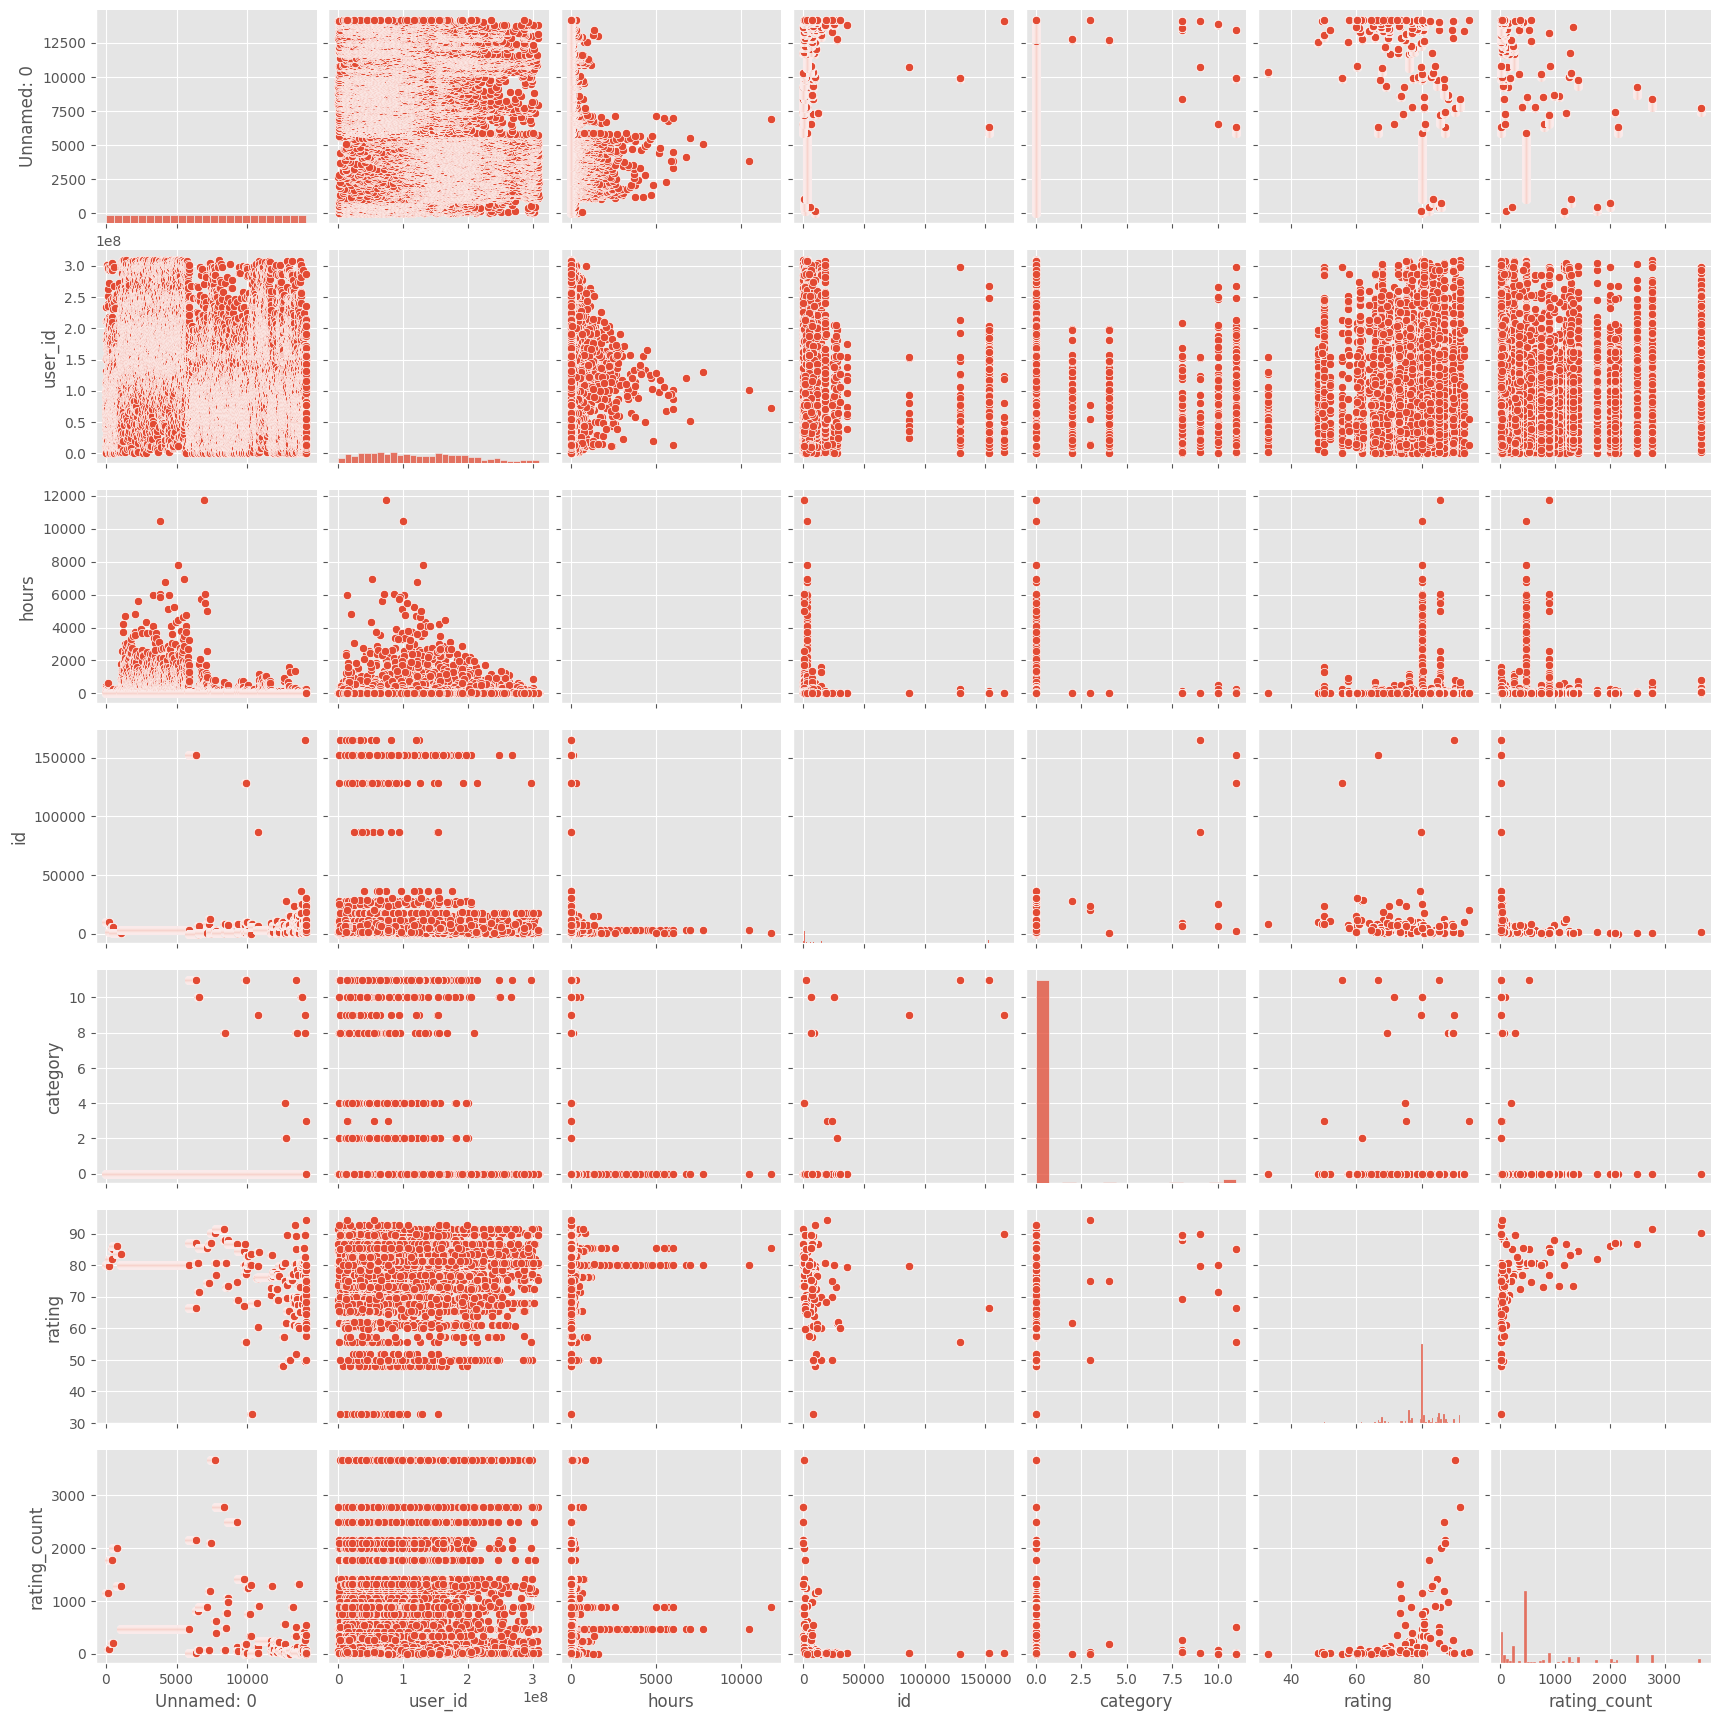

In [44]:
sns.pairplot(df)

In [47]:
df.describe()

user_id         hours             id      category        rating  \
count  1.420600e+04  14206.000000   14206.000000  14206.000000  14206.000000   
mean   1.277183e+08     87.735112    6230.527805      0.351119     79.383373   
std    7.804432e+07    391.876552   20850.966274      1.821546      7.513619   
min    5.250000e+03      0.000000      15.000000      0.000000     32.935780   
25%    6.263878e+07      0.300000    1011.000000      0.000000     77.198962   
50%    1.201283e+08      3.300000    2963.000000      0.000000     79.961349   
75%    1.852338e+08     21.000000    2963.000000      0.000000     83.494274   
max    3.099031e+08  11754.000000  165247.000000     11.000000     94.394091   

       rating_count  
count  14206.000000  
mean     787.191046  
std      848.952597  
min        1.000000  
25%      251.000000  
50%      475.000000  
75%      912.000000  
max     3663.000000

In [48]:
# for col in df:
#     print(df[col].unique())

<AxesSubplot: xlabel='hours', ylabel='Density'>

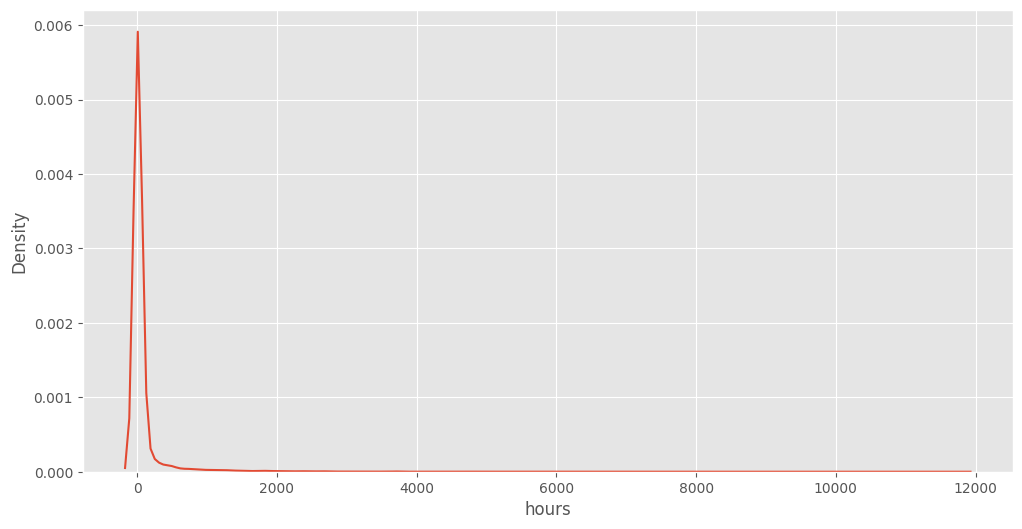

In [49]:
sns.kdeplot(df['hours'])

In [50]:
df["hours"].value_counts()


0.0       2873
0.2        305
0.3        295
0.5        248
0.4        247
          ... 
1177.0       1
1409.0       1
4074.0       1
626.0        1
1363.0       1
Name: hours, Length: 1123, dtype: int64

In [51]:
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)


In [52]:
max_val = df["hours"].max() 

In [53]:
max_val

11754.0

In [54]:
count_unique =df["game_name"].nunique()
print(count_unique)

128


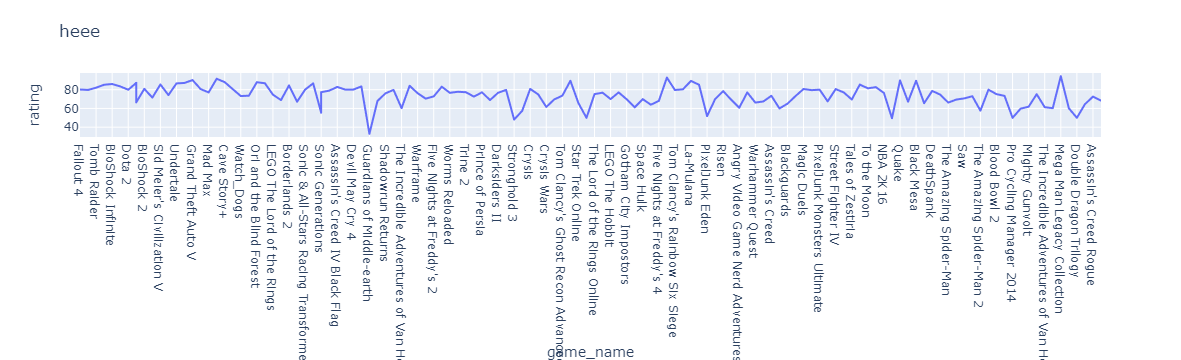

In [55]:
px.line(data_frame=df, x='game_name', y='rating',title="heee")

<AxesSubplot: xlabel='hours'>

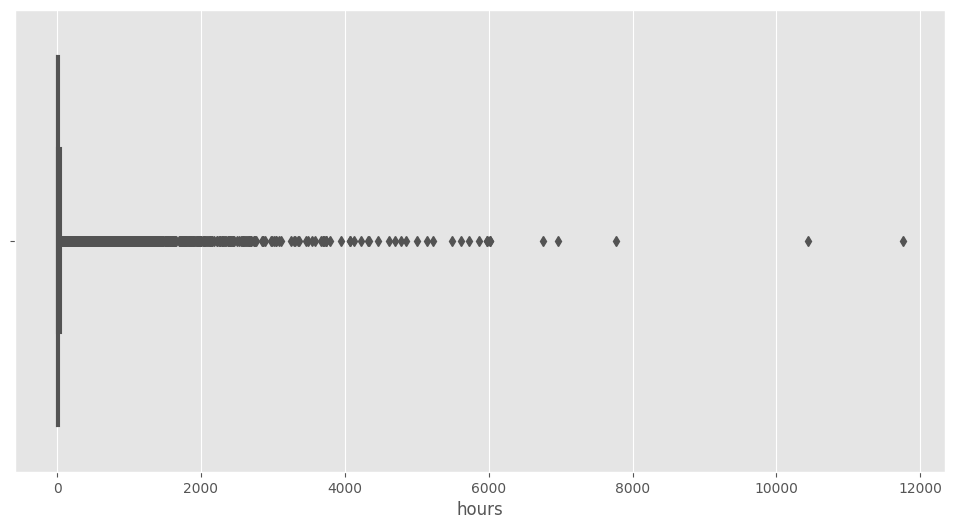

In [56]:

sns.boxplot( x=df["hours"])

In [57]:

df.drop(df[(df['hours'] >6500)].index, inplace=True)

In [58]:
df.drop(df[(df['hours'] < 1)].index, inplace=True)

In [59]:
cutoff=[0.0,3,10,40,150,6015.0]
labels=[1,2,3,4,5]

In [91]:
df["user_rating"]=pd.cut(df["hours"],bins=cutoff,labels=labels)

In [93]:
df['user_rating'] = pd.factorize(df['user_rating'])[0]

In [96]:
df['user_rating'].replace([0, 1,2,3,4],
                        [1, 2,3,4,5], inplace=True)

In [98]:
count_unique =df["user_rating"].nunique()
print(count_unique)

5


In [97]:
df["user_rating"]

0        1
1        1
2        2
3        1
4        3
        ..
14197    4
14199    4
14200    2
14203    1
14205    4
Name: user_rating, Length: 9315, dtype: int64

C:\Users\USCS\AppData\Local\Temp\ipykernel_4924\1440145788.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='user_rating'>

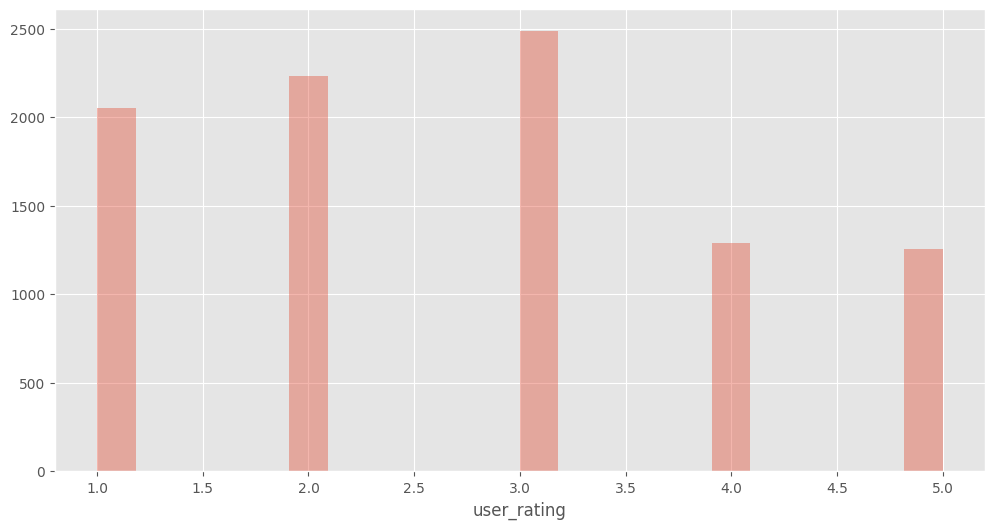

In [62]:
sns.distplot( a=df["user_rating"], hist=True, kde=False, rug=False )

In [63]:
#user_game_matrix=df.pivot_table(index='user_id', columns='game_name', values='user_rating',aggfunc='mean')

In [64]:
#user_game_matrix

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9315 entries, 0 to 14205
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   user_id          9315 non-null   int64   
 1   game_name        9315 non-null   object  
 2   hours            9315 non-null   float64 
 3   id               9315 non-null   int64   
 4   category         9315 non-null   int64   
 5   collection/name  9315 non-null   object  
 6   rating           9315 non-null   float64 
 7   rating_count     9315 non-null   int64   
 8   keywords         9315 non-null   object  
 9   game_modes       9315 non-null   object  
 10  genres           9315 non-null   object  
 11  themes           9315 non-null   object  
 12  franchises       9315 non-null   object  
 13  platforms        9315 non-null   object  
 14  similar_games    9315 non-null   object  
 15  user_rating      9315 non-null   category
dtypes: category(1), float64(2), int64(4), obj

In [66]:
df.describe()

user_id        hours             id     category       rating  \
count  9.315000e+03  9315.000000    9315.000000  9315.000000  9315.000000   
mean   1.284031e+08   129.011648    4897.448309     0.245840    80.517268   
std    7.744449e+07   431.493905   17293.507019     1.556226     6.306012   
min    5.250000e+03     1.000000      15.000000     0.000000    32.935780   
25%    6.426171e+07     3.500000    1011.000000     0.000000    79.961349   
50%    1.220266e+08    12.000000    2963.000000     0.000000    79.961349   
75%    1.838401e+08    48.000000    2963.000000     0.000000    84.629026   
max    3.092169e+08  6015.000000  165247.000000    11.000000    94.394091   

       rating_count  
count   9315.000000  
mean     876.788728  
std      867.750856  
min        1.000000  
25%      475.000000  
50%      475.000000  
75%     1157.000000  
max     3663.000000

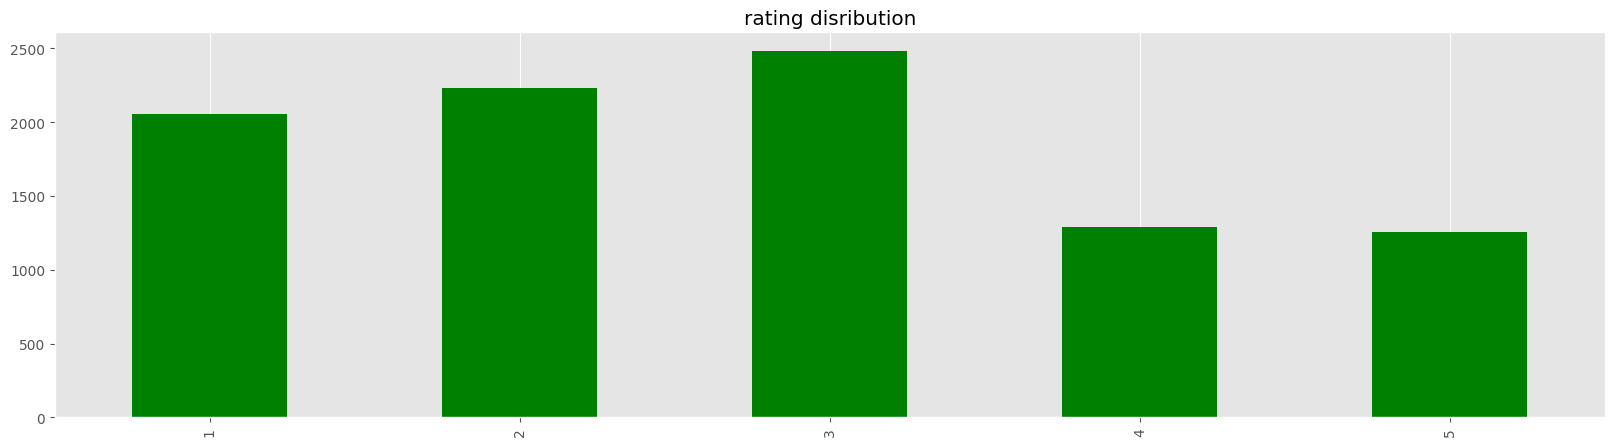

In [67]:
df["user_rating"].value_counts().sort_index().plot(kind="bar", color="green", title="rating disribution", 
                                                figsize=(20,5)).grid(axis='y')
plt.show()

In [68]:
df

user_id                   game_name  hours     id  category  \
0      151603712                   Fallout 4   87.0   9630         0   
1       87445402                   Fallout 4   83.0   9630         0   
2       25096601                   Fallout 4    1.6   9630         0   
3      211925330                   Fallout 4  133.0   9630         0   
4      115396529                   Fallout 4   17.9   9630         0   
...          ...                         ...    ...    ...       ...   
14197  105503045                    Monopoly    7.2  30242         0   
14199   13190476  Mega Man Legacy Collection    6.4  19874         3   
14200  131348564                   Submerged    2.3  11409         0   
14203  204401529      Assassin's Creed Rogue   62.0   7570         0   
14205  190650796                  Doodle God    6.4  18528         0   

                   collection/name     rating  rating_count  \
0                          Fallout  80.177727          1157   
1                          Fallout  80.177727          1157   
2                          Fallout  80.177727          1157   
3                          Fallout  80.177727          1157   
4                          Fallout  80.177727          1157   
...                            ...        ...           ...   
14197                     Monopoly  60.277866             5   
14199  Mega Man Legacy Collections  94.394091            30   
14200                    Submerged  60.165545            23   
14203             Assassin's Creed  72.588896           364   
14205                   Doodle God  68.279088            22   

                                                keywords  \
0      [cold war, hunting, robot, post-apocalyptic, e...   
1      [cold war, hunting, robot, post-apocalyptic, e...   
2      [cold war, hunting, robot, post-apocalyptic, e...   
3      [cold war, hunting, robot, post-apocalyptic, e...   
4      [cold war, hunting, robot, post-apocalyptic, e...   
...                                                  ...   
14197  [family, tabletop, licensed game, language sel...   
14199  [robot, side scroller, health, death, robots, ...   
14200  [post-apocalyptic, ps4, dolphin, adventure, wa...   
14203  [pirates, assassin, stealth, templars, sword, ...   
14205  [dinosaurs, blood, wizards, vampire, dragons, ...   

                         game_modes                                  genres  \
0                   [Single player]           [Shooter, Role-playing (RPG)]   
1                   [Single player]           [Shooter, Role-playing (RPG)]   
2                   [Single player]           [Shooter, Role-playing (RPG)]   
3                   [Single player]           [Shooter, Role-playing (RPG)]   
4                   [Single player]           [Shooter, Role-playing (RPG)]   
...                             ...                                     ...   
14197               [Single player]           [Strategy, Card & Board Game]   
14199               [Single player]  [Shooter, Platform, Adventure, Arcade]   
14200               [Single player]              [Puzzle, Adventure, Indie]   
14203  [Single player, Multiplayer]         [Role-playing (RPG), Adventure]   
14205               [Single player]              [Puzzle, Simulator, Indie]   

                                                  themes          franchises  \
0      [Action, Science fiction, Survival, Sandbox, O...           [Fallout]   
1      [Action, Science fiction, Survival, Sandbox, O...           [Fallout]   
2      [Action, Science fiction, Survival, Sandbox, O...           [Fallout]   
3      [Action, Science fiction, Survival, Sandbox, O...           [Fallout]   
4      [Action, Science fiction, Survival, Sandbox, O...           [Fallout]   
...                                                  ...                 ...   
14197                            [Business, Kids, Party]          [Monopoly]   
14199                          [Action, Science fiction]          [Mega Man] 

In [69]:
df.describe()

user_id        hours             id     category       rating  \
count  9.315000e+03  9315.000000    9315.000000  9315.000000  9315.000000   
mean   1.284031e+08   129.011648    4897.448309     0.245840    80.517268   
std    7.744449e+07   431.493905   17293.507019     1.556226     6.306012   
min    5.250000e+03     1.000000      15.000000     0.000000    32.935780   
25%    6.426171e+07     3.500000    1011.000000     0.000000    79.961349   
50%    1.220266e+08    12.000000    2963.000000     0.000000    79.961349   
75%    1.838401e+08    48.000000    2963.000000     0.000000    84.629026   
max    3.092169e+08  6015.000000  165247.000000    11.000000    94.394091   

       rating_count  
count   9315.000000  
mean     876.788728  
std      867.750856  
min        1.000000  
25%      475.000000  
50%      475.000000  
75%     1157.000000  
max     3663.000000

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9315 entries, 0 to 14205
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   user_id          9315 non-null   int64   
 1   game_name        9315 non-null   object  
 2   hours            9315 non-null   float64 
 3   id               9315 non-null   int64   
 4   category         9315 non-null   int64   
 5   collection/name  9315 non-null   object  
 6   rating           9315 non-null   float64 
 7   rating_count     9315 non-null   int64   
 8   keywords         9315 non-null   object  
 9   game_modes       9315 non-null   object  
 10  genres           9315 non-null   object  
 11  themes           9315 non-null   object  
 12  franchises       9315 non-null   object  
 13  platforms        9315 non-null   object  
 14  similar_games    9315 non-null   object  
 15  user_rating      9315 non-null   category
dtypes: category(1), float64(2), int64(4), obj

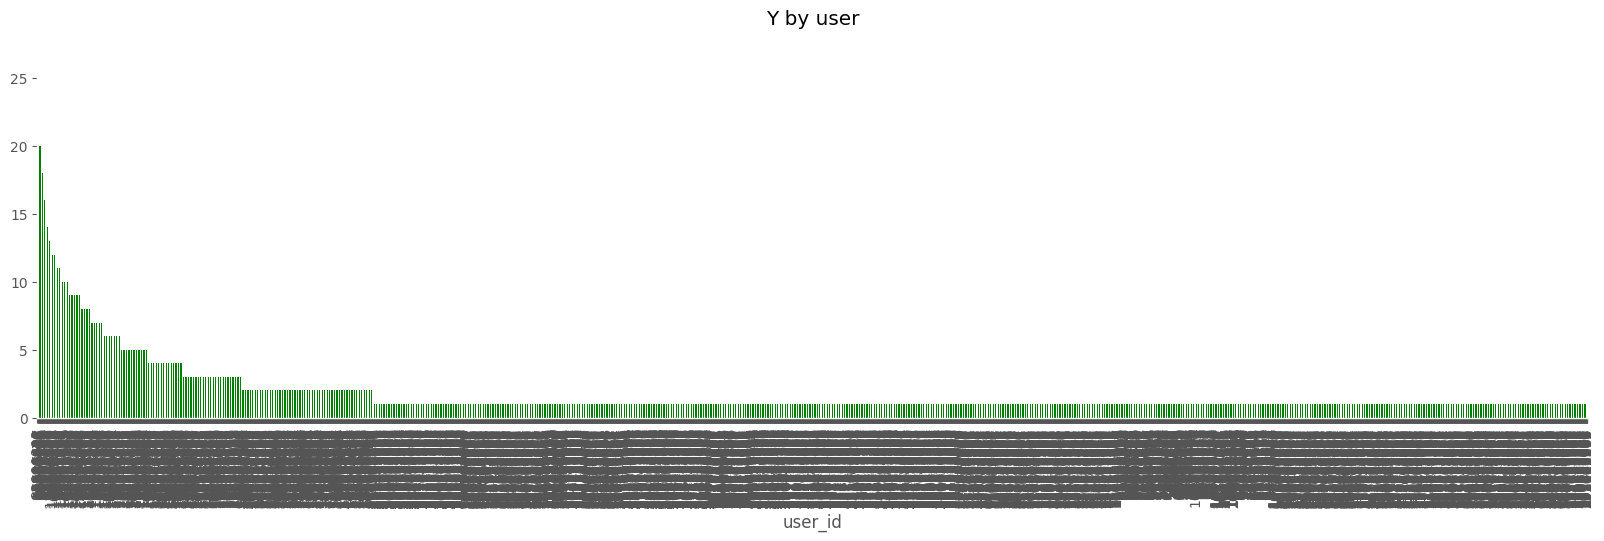

In [71]:
df.groupby("user_id").count()["game_name"].sort_values(ascending=False).plot(
    kind="bar", color="green", title="Y by user", figsize=(20,5)).grid(axis='y')

In [99]:
tmp = df.copy()
dtf_users = tmp.pivot_table(index="user_id", columns="game_name", values="user_rating",fill_value=math.nan)
print(len(set(dtf_users.columns)-set(dtf_users.index) ))
# missing_cols = list(set(dtf_users.index) - set(dtf_users.columns))
# missing_cols
# for col in missing_cols:
#     dtf_users[col] = np.nan
# dtf_users = dtf_users[sorted(dtf_users.columns)]
dtf_users

123


game_name  12 Labours of Hercules  Aliens vs. Predator  \
user_id                                                  
5250                          NaN                  NaN   
76767                         NaN                  NaN   
229911                        NaN                  NaN   
298950                        NaN                  NaN   
561758                        NaN                  NaN   
...                           ...                  ...   
309058572                     NaN                  NaN   
309107542                     NaN                  NaN   
309167186                     NaN                  NaN   
309213952                     NaN                  NaN   
309216884                     NaN                  NaN   

game_name  Angry Video Game Nerd Adventures  Assassin's Creed  \
user_id                                                         
5250                                    NaN               NaN   
76767                                   NaN               NaN   
229911                                  NaN               NaN   
298950                                  NaN               NaN   
561758                                  NaN               NaN   
...                                     ...               ...   
309058572                               NaN               NaN   
309107542                               NaN               NaN   
309167186                               NaN               NaN   
309213952                               NaN               NaN   
309216884                               NaN               NaN   

game_name  Assassin's Creed Brotherhood  Assassin's Creed II  \
user_id                                                        
5250                                NaN                  NaN   
76767                               NaN                  NaN   
229911                              NaN                  NaN   
298950                              NaN                  NaN   
561758                              NaN                  NaN   
...                                 ...                  ...   
309058572                           NaN                  NaN   
309107542                           NaN                  NaN   
309167186                           NaN                  NaN   
309213952                           NaN                  NaN   
309216884                           NaN                  NaN   

game_name  Assassin's Creed III  Assassin's Creed IV Black Flag  \
user_id                                                           
5250                        NaN                             NaN   
76767                       NaN                             NaN   
229911                      NaN                             NaN   
298950                      NaN                             NaN   
561758                      NaN                             NaN   
...                         ...                             ...   
309058572                   NaN                             NaN   
309107542                   NaN                             NaN   
309167186                   NaN                             NaN   
309213952                   NaN                             NaN   
309216884                   NaN                             NaN   

game_name  Assassin's Creed Revelations  Assassin's Creed Rogue  ...  Trine 2  \
user_id                                                          ...            
5250                                NaN                     NaN  ...      NaN   
76767                               NaN                     NaN  ...      NaN   
229911                              NaN                     NaN  ...      NaN   
298950                              NaN                     NaN  ...      2.0   
561758                              NaN                     NaN  ...      NaN   
...                                 ...                     ...  ...      ...   
309058572                           NaN       

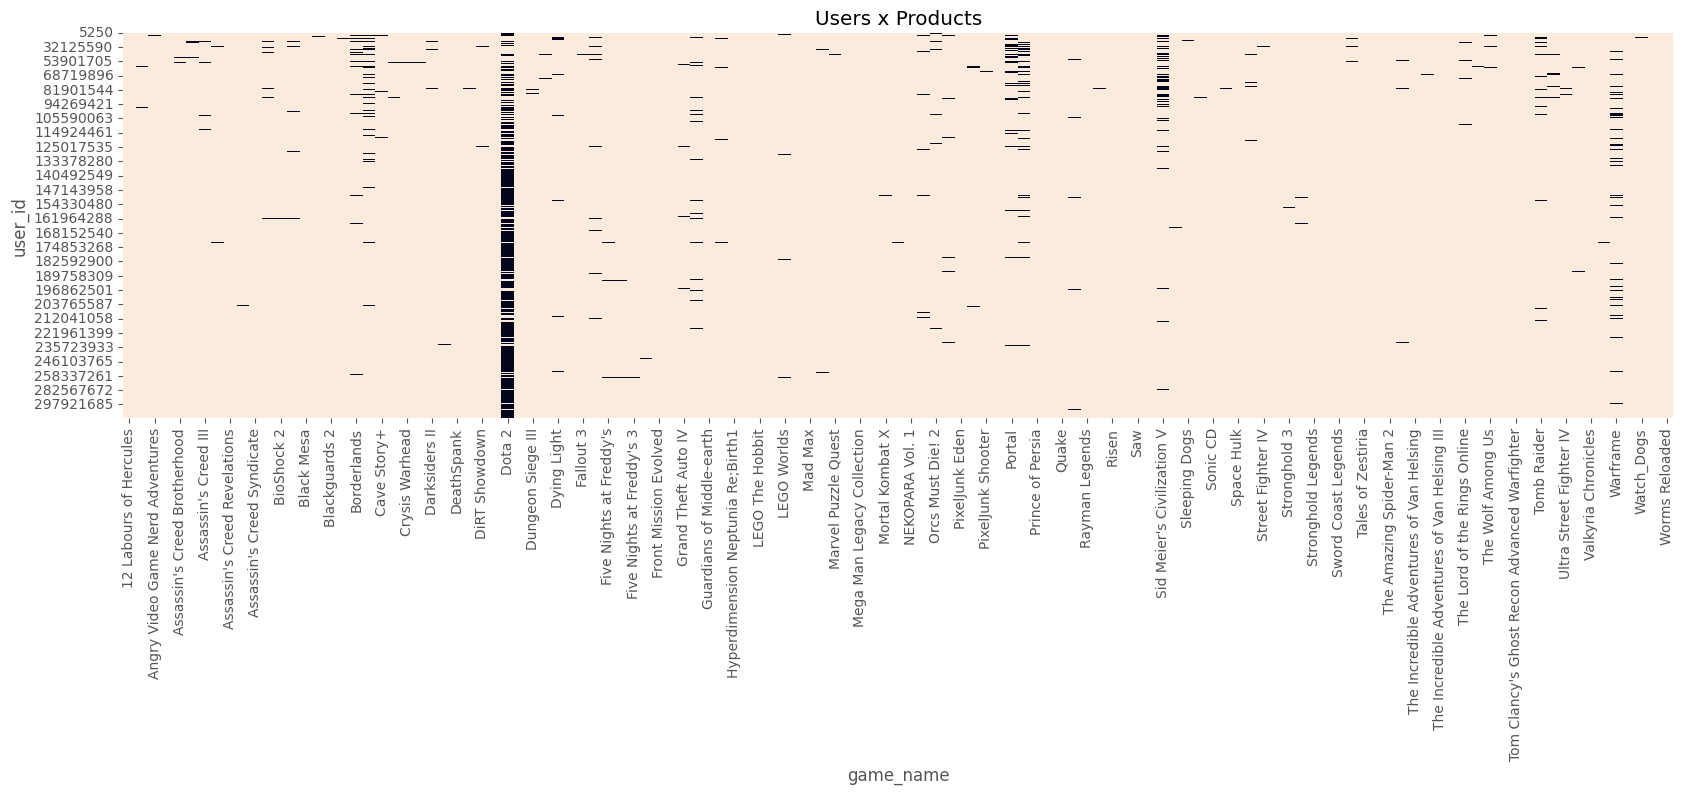

In [81]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(dtf_users.isnull(), vmin=0, vmax=1, cbar=False, ax=ax).set_title("Users x Products")
plt.show()

 # Model Building